# Clustering with K-Means, K-Medoids (PAM) and Principal Component Analysis (PCA) using USArrest Dataset
## Jupyter Notebook to demonstrate CLUSTERING Algorithms

K-means is an unsupervised clustering algorithm designed to partition unlabelled data into a certain number (thats the “ K”) of distinct groupings. In other words, k-means finds observations that share important characteristics and classifies them together into clusters. A good clustering solution is one that finds clusters such that the observations within each cluster are more similar than the clusters themselves.

There are countless examples of where this automated grouping of data can be extremely useful. For example, consider the case of creating an online advertising campaign for a brand new range of products being released to the market. While we could display a single generic advertisement to the entire population, a far better approach would be to divide the population into clusters of people who hold shared characteristics and interests displaying customised advertisements to each group. K-means is an algorithm that finds these groupings in big datasets where it is not feasible to be done by hand.

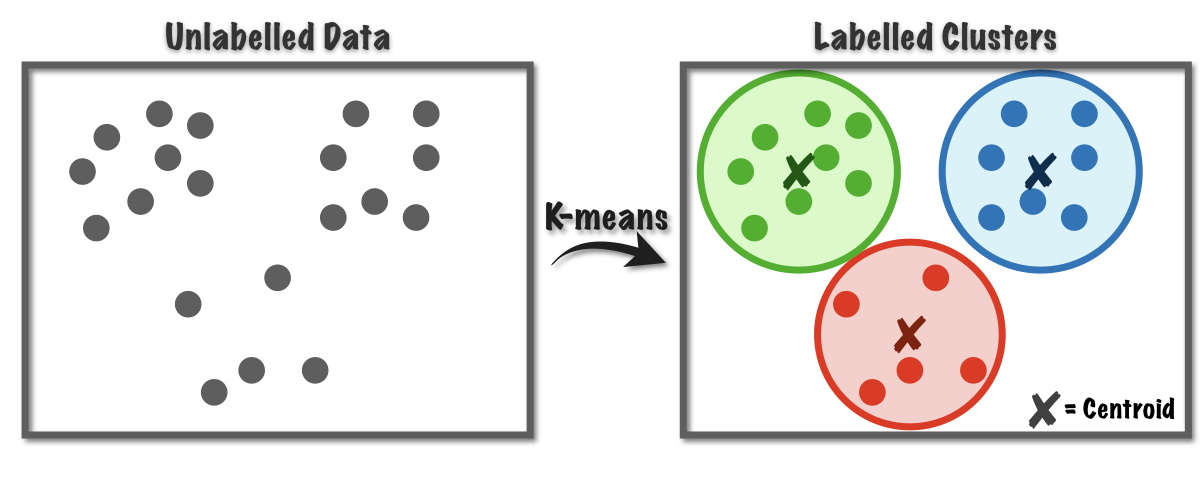



---

Source: KAGGLE https://www.kaggle.com/berkayalan/usarrest-crime-kmeans-clustering-elbow

This Kaggle notenbook has been adapted and extend to the examples of CAS BIA for Clustering algorithms k-Means and k-Medoids

---
Author:
*   dr.daniel benninger  
---
History:
*   v1, June 2021, dbe --- minor adaptions for CAS BIA11
*   v2, May  2022, dbe --- minor corrections for BINA-FS22
*   v3, May  2023, dbe --- dataload from github repository / BINA-FS23  
*   v4, May  2024, dbe --- minor adaprions for BINA FS24

---


# A) Setup/Installations
Install **scikit-learn-extra** a Python module for machine learning that extends scikit-learn. It includes algorithms that are useful but do not satisfy the scikit-learn inclusion criteria, for instance due to their novelty or lower citation number. E.g. *clustering with KMedoids* and *Common-nearest-neighbors*

In [1]:
!pip install scikit-learn-extra

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 9.2 MB/s eta 0:00:00


Load necessary libraries

In [2]:
from warnings import filterwarnings
filterwarnings("ignore")
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import scipy as sp
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids


# from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

# B) Data (Up)Load



> Hinweis: DieseNotebook Version bezieht die Daten (*SampleData_USArrests.csv*) direkt vom öffentlichen Github Repository

In [3]:
# Loading US Arrests Sample Data from Github Repository into dataframe variable
filePATH = "https://raw.githubusercontent.com/sawubona-repo/BINA-FS24-WORK/main/LB09-Clustering%2BClassification/Python/"
fileNAME = "SampleData_USArrests.csv"

# df = pd.read_csv('https://github.com/sawubona-gmbh/BINA-FS23-WORK/raw/main/LB09-ClusteringClassification/Python/SampleData_USArrests-v2.csv', sep=',').copy()
df = pd.read_csv(filePATH+fileNAME, sep=',').copy()

df.head(5)


,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


### Check Data - Structure and Content

In [4]:
# Dataframe structure verification
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   State     50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [5]:
# Making Urban Names (States) as İndex
df.index = df.iloc[:,0]
df= df.iloc[:,1:5]

In [6]:
# Show first entries
df.head()

,Murder,Assault,UrbanPop,Rape
State,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [7]:
# Check for NULL values
df.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

# C) Initial (descriptive) Analysis

**Histogram Visualization** - Hint: use different settings for *bins*




array([[<Axes: title={'center': 'Murder'}>,
        <Axes: title={'center': 'Assault'}>],
       [<Axes: title={'center': 'UrbanPop'}>,
        <Axes: title={'center': 'Rape'}>]], dtype=object)

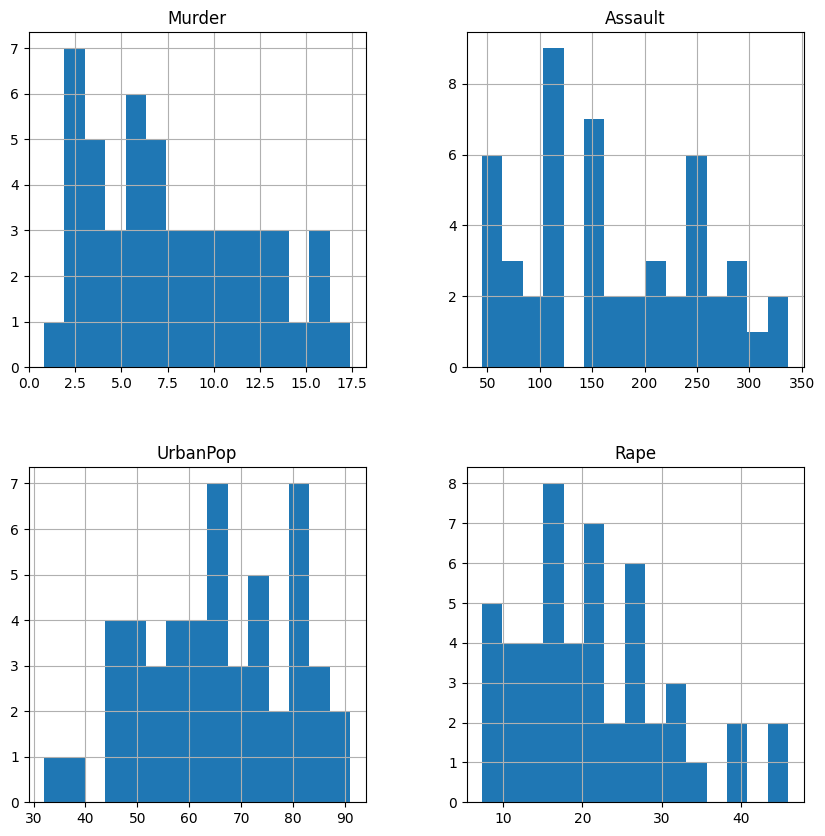

In [8]:
df.hist(bins=15,figsize=(10,10))

Calculate the **Magic Five** statistical measure (i.e. *Tukey Measure*) for each variable and visualize them with **Boxplot** diagrams

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


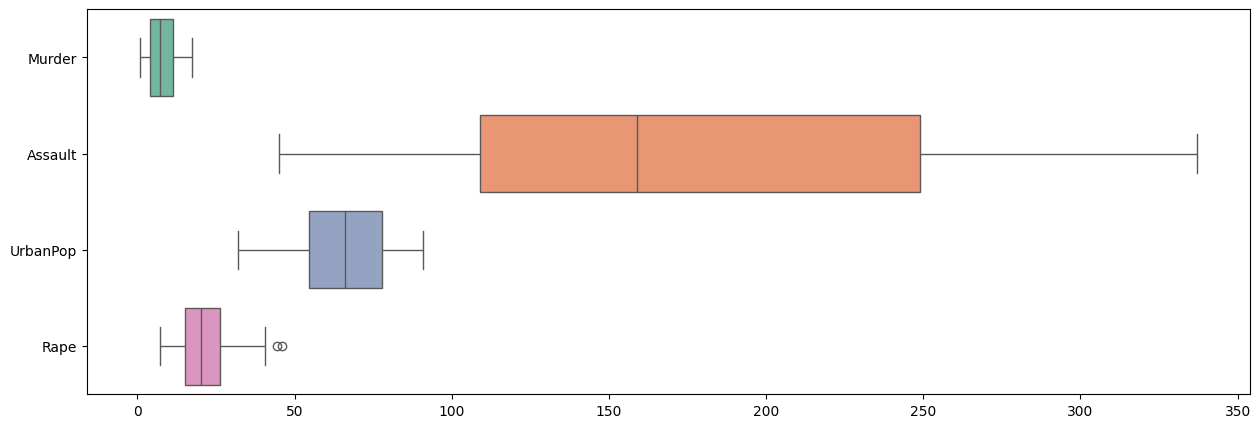

In [10]:
plt.figure(figsize=(15,5))

diag_box = sns.boxplot(data=df, orient="h", palette="Set2")

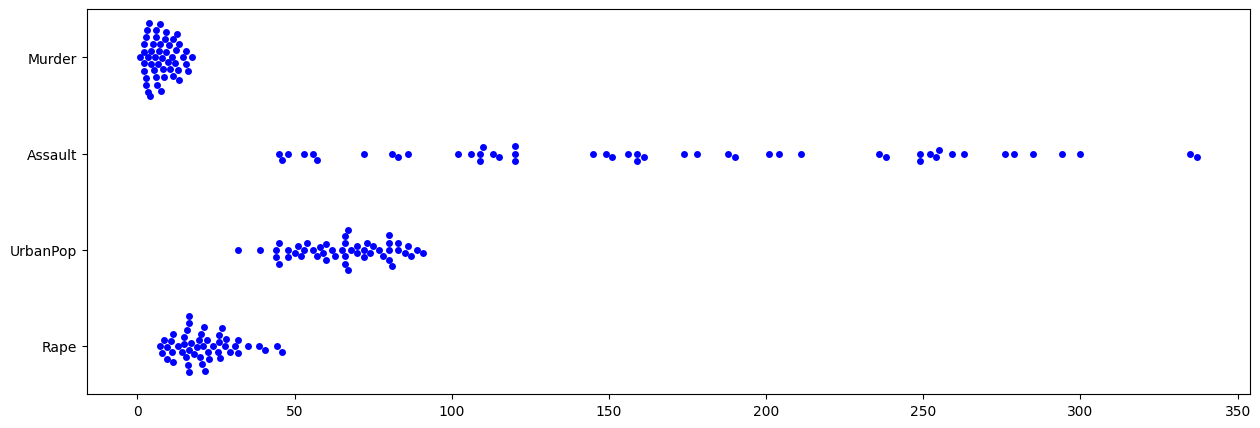

In [11]:
plt.figure(figsize=(15,5))
diag_box = sns.swarmplot(data=df, orient="h", color="blue")

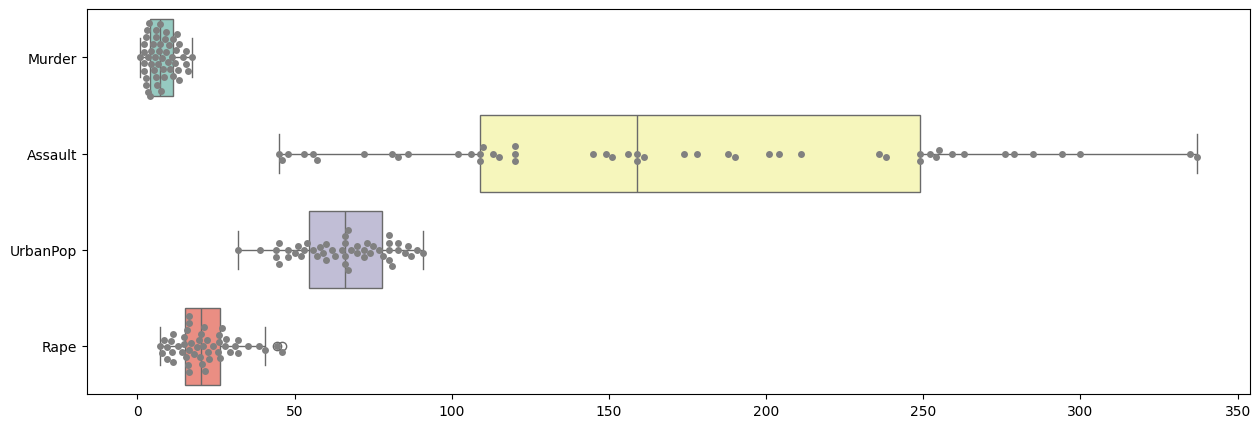

In [12]:
plt.figure(figsize=(15,5))
diag_box = sns.boxplot(data=df, orient="h", palette="Set3")
diag_box = sns.swarmplot(data=df, orient="h", color="gray")

# D) Normalize all variables using z-Score Tranformation

In [13]:
from scipy.stats import zscore
df_trans = df.apply(zscore)

In [14]:
# Show first entries of the transformed data
df_trans.head(5)

,Murder,Assault,UrbanPop,Rape
State,,,,
Alabama,1.255179,0.790787,-0.526195,-0.003451
Alaska,0.513019,1.118060,-1.224067,2.509424
Arizona,0.072361,1.493817,1.009122,1.053466
Arkansas,0.234708,0.233212,-1.084492,-0.186794
California,0.281093,1.275635,1.776781,2.088814


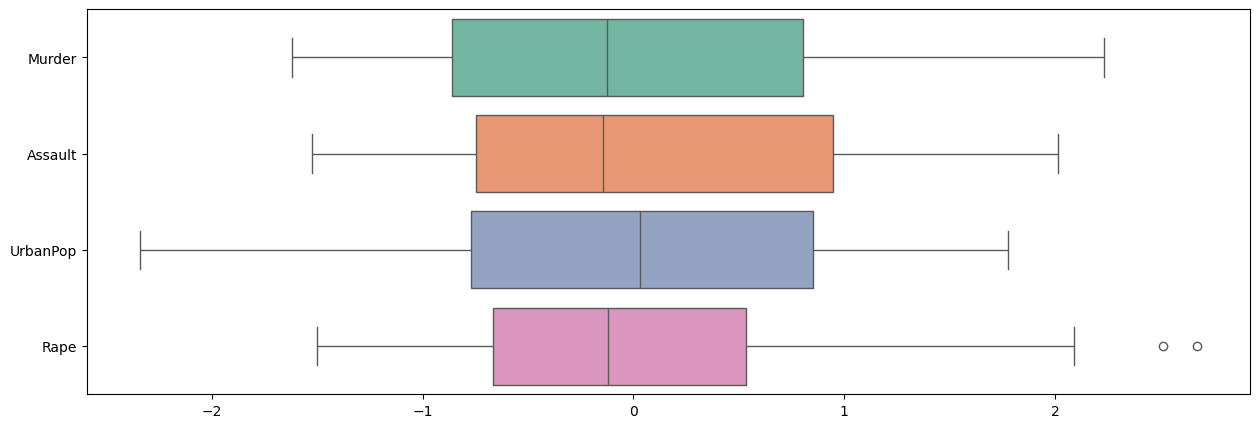

In [15]:
plt.figure(figsize=(15,5))
diag_box2 = sns.boxplot(data=df_trans, orient="h", palette="Set2")

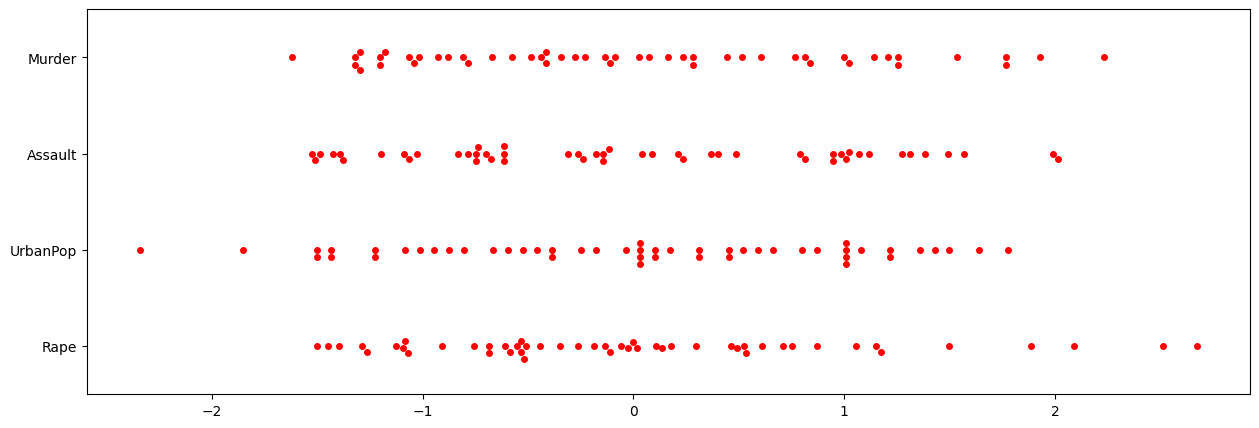

In [16]:
plt.figure(figsize=(15,5))
diag_box2 = sns.swarmplot(data=df_trans, orient="h", color="red")

---  
---  
# [Part 1] **Clustering** with **k-Means** Algorithm  
---

In [18]:
# Initialize k-Means algorithm with k (= no of clusters)
kmeans = KMeans(n_clusters=4)

In [19]:
# Apply k-Means algorithm to dataframe
k_fit= kmeans.fit(df)

In [ ]:
# Check calculated No of Clusters
k_fit.n_clusters

4

Show the result (**cluster centers**) of the kMeans clustering

In [20]:
# Show Centers of Clusters for each variable/feature
k_fit.cluster_centers_

array([[ 11.8125    , 272.5625    ,  68.3125    ,  28.375     ],
       [  8.21428571, 173.28571429,  70.64285714,  22.84285714],
       [  2.95      ,  62.7       ,  53.9       ,  11.51      ],
       [  5.59      , 112.4       ,  65.6       ,  17.27      ]])

In [21]:
# Show the cluster labels (class) for each Urban (State)
k_fit.labels_

array([0, 0, 0, 1, 0, 1, 3, 0, 0, 1, 2, 3, 0, 3, 2, 3, 3, 0, 2, 0, 1, 0,
       2, 0, 1, 3, 3, 0, 2, 1, 0, 0, 0, 2, 3, 1, 1, 3, 1, 0, 2, 1, 1, 3,
       2, 1, 1, 2, 2, 1], dtype=int32)

## k-Means Cluster Visualisation (2-D)

In [22]:
kmeans= KMeans(n_clusters=2)   # Set k-Parameter to 2

k_fit = kmeans.fit(df)
clusters = k_fit.labels_

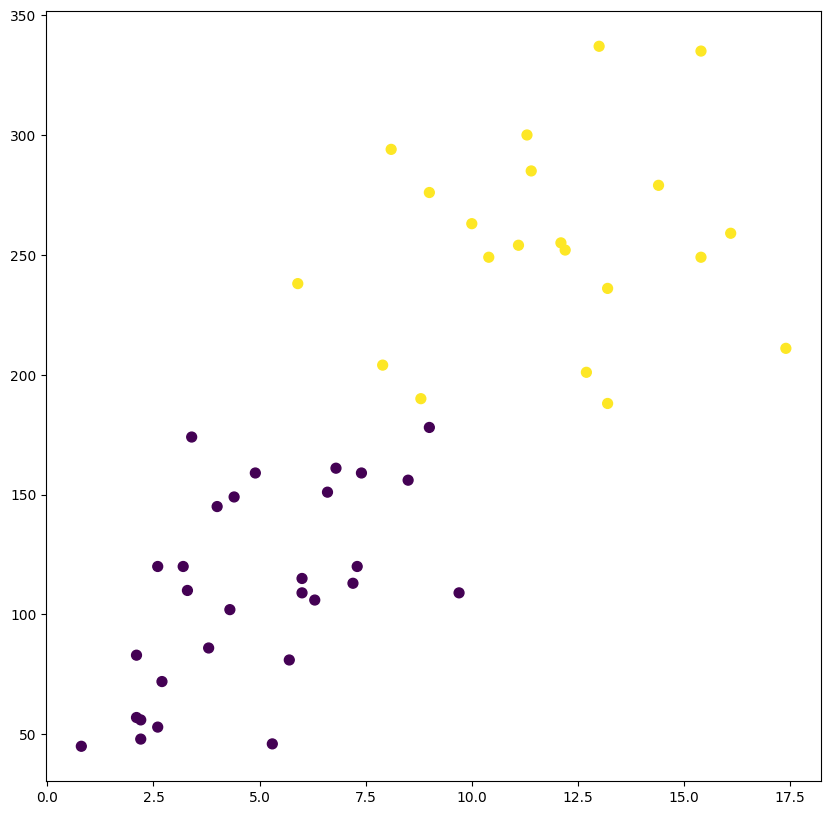

In [23]:
plt.figure(figsize=(10,10))

# Scatterplot of 2 selected features
plt.scatter(df.iloc[:,0],df.iloc[:,1],c=clusters,s=50,cmap="viridis")

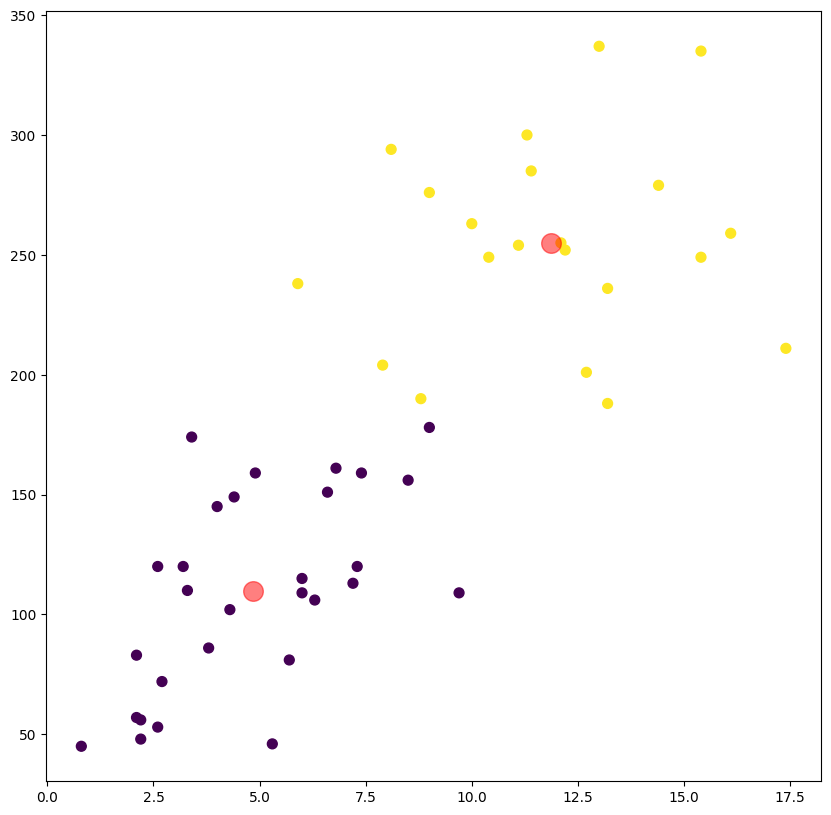

In [24]:
plt.figure(figsize=(10,10))

plt.scatter(df.iloc[:,0],df.iloc[:,1],c=clusters,s=50,cmap="viridis")

# And Adding Centroids to the Scatterplot
centers = k_fit.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],c="red",s = 200,alpha=0.5)

## k-Means Cluster Visualisation (3-D)

In [25]:
from mpl_toolkits.mplot3d import Axes3D
# !pip install --upgrade matplotlib
# import mpl_toolkits

In [26]:
# Set k-Means Parameter n_clusters (no of clusters) to 3
kmeans= KMeans(n_clusters=3)
k_fit =kmeans.fit(df)

# Extract cluster labels and cluster centers
clusters= k_fit.labels_
centers = kmeans.cluster_centers_

In [31]:
# 3-D Scatterplot of 3 selected features
plt.rcParams["figure.figsize"] =(16,9)

fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(df.iloc[:,0],df.iloc[:,1],df.iloc[:,2],c=clusters,s=50,cmap="viridis")
ax.scatter(centers[:,0],centers[:,1],centers[:,2],c="red",s = 500)

fig.show()

<Figure size 1600x900 with 0 Axes>

# Clusters and Variables/Features

In [32]:
# Set k-Means Parameter (no of clusters)
kmeans= KMeans(n_clusters=3)

k_fit =kmeans.fit(df)

# Extract cluster labels
clusters= k_fit.labels_

In [33]:
pd.DataFrame({"State": df.index,"Cluster": clusters})[:10]

,State,Cluster
0,Alabama,0
1,Alaska,0
2,Arizona,0
3,Arkansas,2
4,California,0
5,Colorado,2
6,Connecticut,1
7,Delaware,0
8,Florida,0
9,Georgia,2


In [34]:
# Adding Cluster labels info to the dataframe
df["Cluster"] = clusters

In [35]:
# Show first entries
df.head(10)

,Murder,Assault,UrbanPop,Rape,Cluster
State,,,,,
Alabama,13.2,236,58,21.2,0
Alaska,10.0,263,48,44.5,0
Arizona,8.1,294,80,31.0,0
Arkansas,8.8,190,50,19.5,2
California,9.0,276,91,40.6,0
Colorado,7.9,204,78,38.7,2
Connecticut,3.3,110,77,11.1,1
Delaware,5.9,238,72,15.8,0
Florida,15.4,335,80,31.9,0


In [36]:
df.Cluster.unique()

array([0, 2, 1], dtype=int32)

In [37]:
# There is a cluster called "0". We want to avoid it, thus "incremening" cluster label no for each observation
df["Cluster"]=df["Cluster"]+1

In [38]:
df.head(10)

,Murder,Assault,UrbanPop,Rape,Cluster
State,,,,,
Alabama,13.2,236,58,21.2,1
Alaska,10.0,263,48,44.5,1
Arizona,8.1,294,80,31.0,1
Arkansas,8.8,190,50,19.5,3
California,9.0,276,91,40.6,1
Colorado,7.9,204,78,38.7,3
Connecticut,3.3,110,77,11.1,2
Delaware,5.9,238,72,15.8,1
Florida,15.4,335,80,31.9,1


# Use the **Elbow Method** for the Optimization of the Cluster Numbers

We want *high similarity(Max) inside clusters* and *low similarity(Min) inter clusters* to find an optimized value of the *sum of squared errors* (SSR).

In [39]:
#!pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer

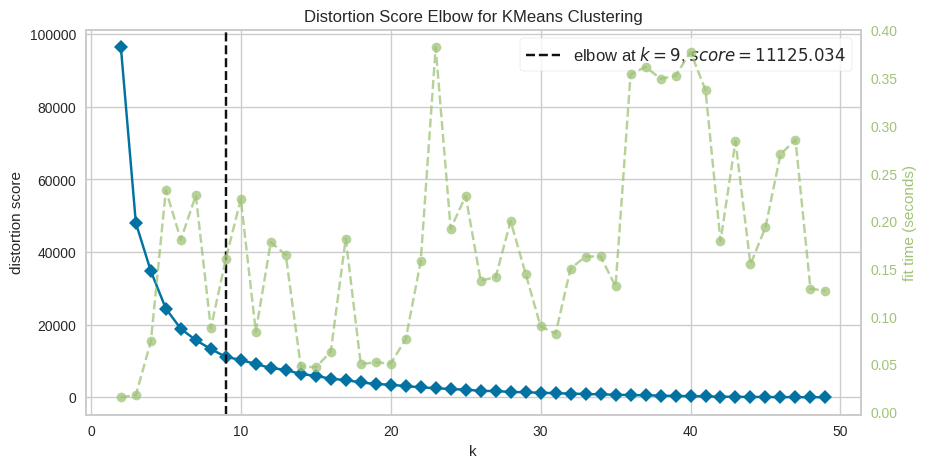

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [40]:
kmeans= KMeans()

# Run kMeans algorithm for different k; k= number of cluster to be attempted
plt.figure(figsize=(10,5))

visualizer = KElbowVisualizer(kmeans, k=(2,50))

visualizer.fit(df)
visualizer.poof()

In [41]:
# Calculateand list "optimal" kMeans clustering (no of cluster = 8)
kmeans= KMeans(n_clusters=8)

k_fit =kmeans.fit(df)

clusters= k_fit.labels_
pd.DataFrame({"State": df.index,"Cluster": clusters})[:10]

,State,Cluster
0,Alabama,2
1,Alaska,5
2,Arizona,5
3,Arkansas,7
4,California,5
5,Colorado,7
6,Connecticut,4
7,Delaware,2
8,Florida,0
9,Georgia,7


In [42]:
k_fit.cluster_centers_

array([[ 14.2       , 336.        ,  62.5       ,  24.        ,
          1.        ],
       [  5.75      , 156.75      ,  74.        ,  19.4       ,
          3.        ],
       [ 12.05      , 249.        ,  70.5       ,  25.9375    ,
          1.        ],
       [  3.575     ,  80.5       ,  50.25      ,  11.2       ,
          2.        ],
       [  5.59      , 112.4       ,  65.6       ,  17.27      ,
          2.        ],
       [ 10.7       , 282.83333333,  67.33333333,  33.08333333,
          1.        ],
       [  2.53333333,  50.83333333,  56.33333333,  11.71666667,
          2.        ],
       [ 11.5       , 195.33333333,  66.16666667,  27.43333333,
          3.        ]])

---  
---  
# [Part 2] **Clustering** with **k-Medoid** Algorithm  
---

Using **Partitioning Around Medoid** (PAM) as a variant of the clustering algorithm using *existing observations* as *centroids of clusters*

### Configuration of the PAM clustering algorithm

In [43]:
# Key Parameters: "metric" = distance function / n_clusters = Number of Clusters to detect
kmedoid = KMedoids(metric="manhattan", n_clusters=2, init="heuristic", max_iter=200)

print(kmedoid)

KMedoids(max_iter=200, metric='manhattan', n_clusters=2)


In [44]:
# Apply configured clustering algorithm to USArrests dataframe
pam_fit= kmedoid.fit(df)

# Show detected number of clusters
pam_fit.n_clusters

2

In [45]:
# Show applied distance function
pam_fit.metric

'manhattan'

In [46]:
# Show calculated PAM centroids
pam_fit.cluster_centers_

array([[  6. , 115. ,  66. ,  18. ,   2. ],
       [ 12.1, 255. ,  74. ,  35.1,   1. ]])

In [47]:
pam_fit.labels_

array([1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0])

In [48]:
# Extract cluster labels
clusters = pam_fit.labels_

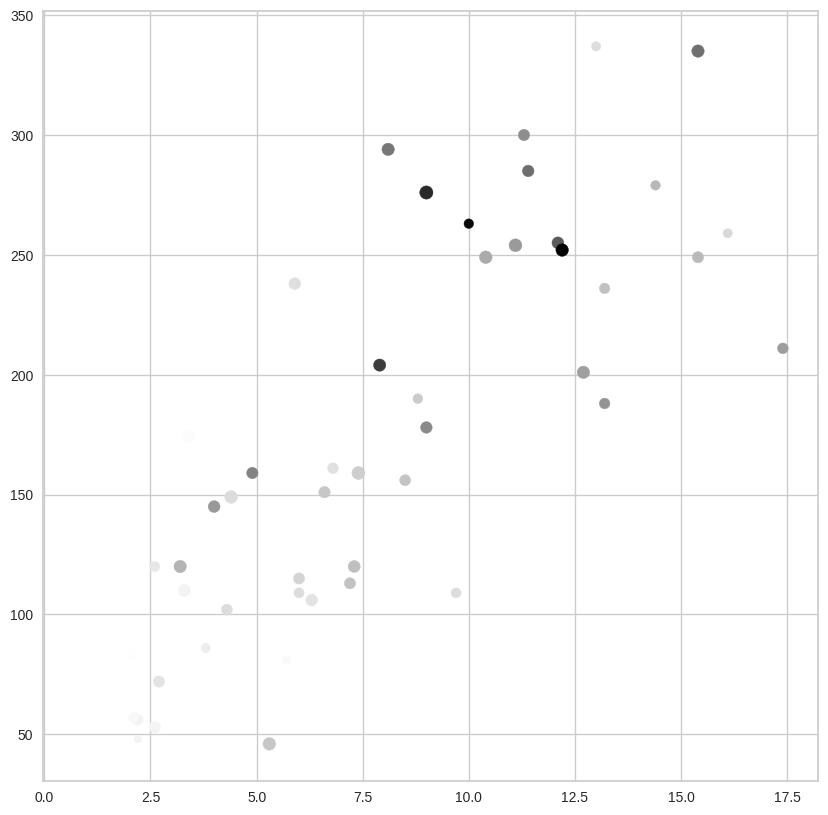

In [49]:
plt.figure(figsize=(10,10))

plt.scatter(df.iloc[:,0],df.iloc[:,1],df.iloc[:,2],df.iloc[:,3],)

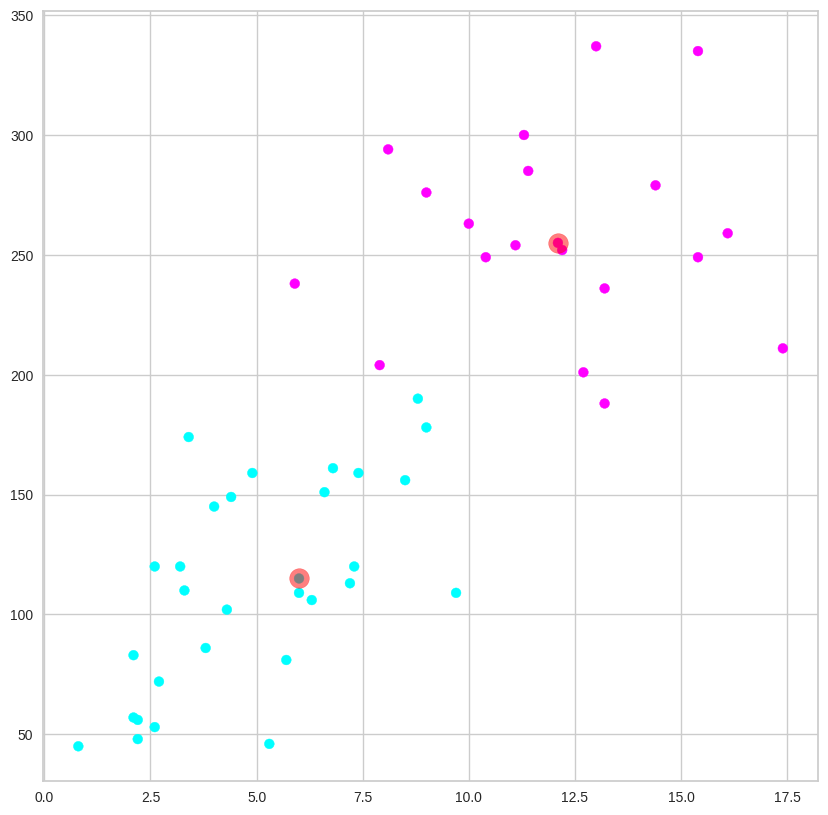

In [50]:
plt.figure(figsize=(10,10))

# Scatterplot of 2 selected features
plt.scatter(df.iloc[:,0],df.iloc[:,1],c=clusters,s=50,cmap="cool")

# Adding Centroids to the Scatterplot
centers = pam_fit.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],c="red",s = 200,alpha=0.5)

---
---
# [ADDON] **Principal Component Analysis** (PCA) for Dimension Reduction  


**Principal Component Analysis** (PCA) is a popular technique for deriving a set of low dimensional features from a larget set of variables. However, another popular application of PCA is visualizing higher dimensional data.

* For an indepth description of the "principal component analysis" (PCA) and R example script, see https://rpubs.com/cyobero/pca-clustering

* For a discussion of how to use PCA and Clustering in combination incl. Python example scripts, see https://365datascience.com/tutorials/python-tutorials/pca-k-means

In [51]:
df.head()

,Murder,Assault,UrbanPop,Rape,Cluster
State,,,,,
Alabama,13.2,236,58,21.2,1
Alaska,10.0,263,48,44.5,1
Arizona,8.1,294,80,31.0,1
Arkansas,8.8,190,50,19.5,3
California,9.0,276,91,40.6,1


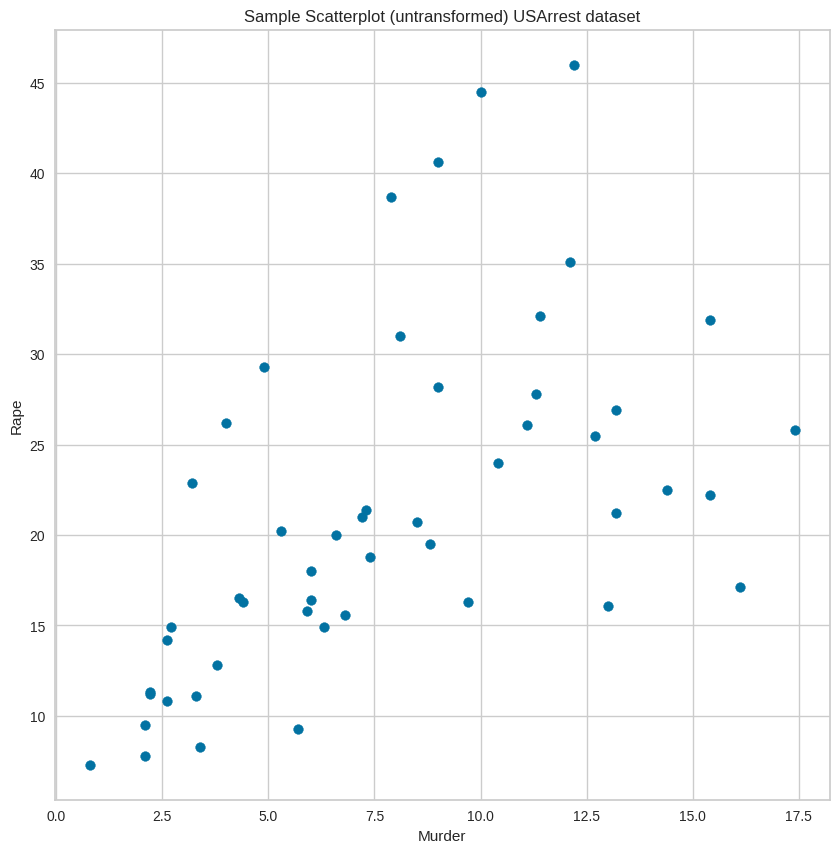

In [52]:
# Plot a sample scatterplot with two selected features (e.g. "Murder x Rape")
plt.figure(figsize=(10,10))

plt.scatter(df.iloc[:,0],df.iloc[:,3])

plt.title("Sample Scatterplot (untransformed) USArrest dataset")
plt.xlabel("Murder")
plt.ylabel("Rape")
plt.show()

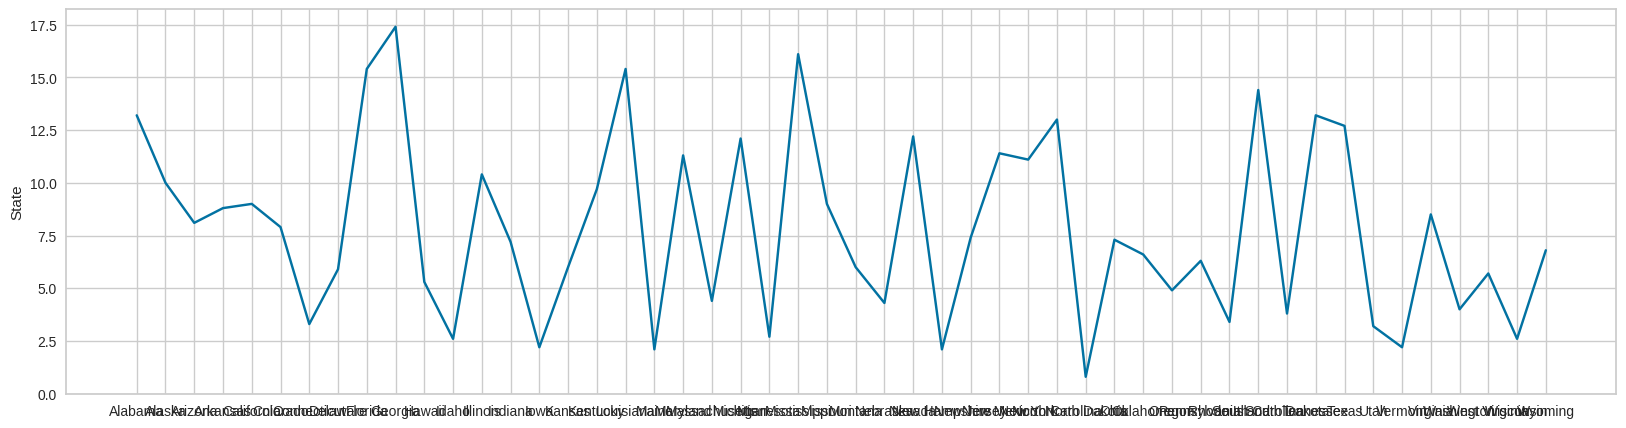

In [53]:
# Plot a single feature (e.g. "Murder")
plt.figure(figsize=(20, 5))

plt.plot(df.iloc[:,0])

plt.ylabel("#Murder")
plt.ylabel("State")
plt.show()

### Import PCA library from scikit-learn and configure the algorithm

In [54]:
from sklearn.decomposition import PCA

In [55]:
# Configure the PCA algorithm (Key Parameter: no of components)
pca = PCA(n_components=2)

pca.set_params

<bound method BaseEstimator.set_params of PCA(n_components=2)>

### Apply PCA algorithm to USArrest dataframe and show results

In [56]:
principalComponents = pca.fit_transform(df)

In [57]:
# Show results
principalComponents.T

array([[  64.80593695,   92.83092976,  124.07132319,   18.33503673,
         107.42621815,   34.97076293,  -60.8868298 ,   66.73476137,
         165.24703691,   40.52992366, -123.53499776,  -51.79661582,
          78.99568322,  -57.55053163, -115.58572599,  -55.78928388,
         -62.38268008,   78.28124896,  -89.26025147,  129.3332055 ,
         -21.27090645,   85.4550518 ,  -98.95394335,   86.85991676,
           7.98136878,  -62.48313474,  -69.09598579,   83.61710899,
        -114.77629729,  -10.82046735,  114.8713809 ,   84.29775476,
         164.32824669, -127.49438578,  -50.08648643,  -19.69834125,
         -11.15495113,  -64.68864404,    3.05908972,  107.28440232,
         -86.10595461,   17.50125839,   31.28593987,  -49.91307119,
        -124.71327285,  -14.82211197,  -25.08040915,  -91.54381392,
        -118.17524905,  -10.43924351],
       [  11.45423248,   17.98722609,   -8.82595577,   16.69107813,
         -22.51413357,  -13.73167794,  -12.92905754,   -1.34677715,
         

In [58]:
principalComponents_df = pd.DataFrame(data = principalComponents
             , columns = ['PCA1', 'PCA2'])

principalComponents_df.head(10)

,PCA1,PCA2
0,64.805937,11.454232
1,92.830930,17.987226
2,124.071323,-8.825956
3,18.335037,16.691078
4,107.426218,-22.514134
5,34.970763,-13.731678
6,-60.886830,-12.929058
7,66.734761,-1.346777
8,165.247037,-6.272523
9,40.529924,7.276669


### Visualize the - PCA- transformed USArrest dataframe

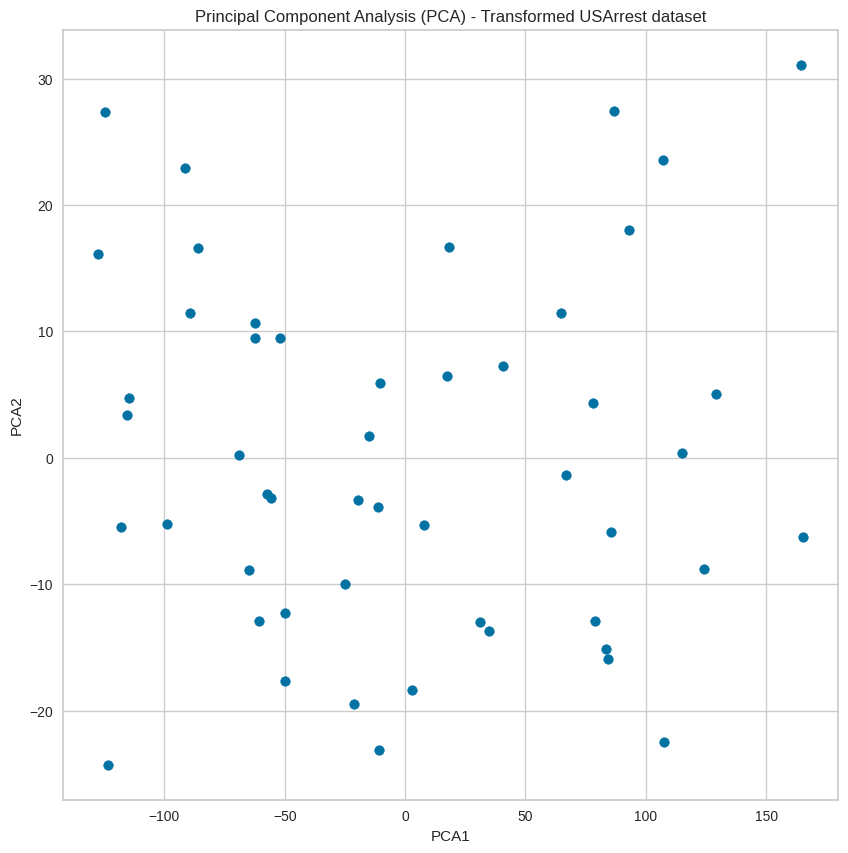

In [59]:
plt.figure(figsize=(10,10))

plt.scatter(principalComponents[:,0], principalComponents[:,1])

plt.title("Principal Component Analysis (PCA) - Transformed USArrest dataset")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.show()